# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

# Import datasets

In [2]:
events=pd.read_csv(r'..\datasets\athlete_events.csv')
noc=pd.read_csv(r'..\datasets\noc_regions.csv')

# Exploratory Data Analysis

##### Preview the dataset

In [3]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


##### Joining files

In [5]:
df=events.merge(noc,on='NOC',how='left')

In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (271116, 17)


In [8]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

##### Check the data types of columns

In [9]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

##### Summary of dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
df.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
region       205
notes         21
dtype: int64

##### Statistical properties of dataset

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [13]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,271116,134732,Robert Tait McKenzie,58
Sex,271116,2,M,196594
Team,271116,1184,United States,17847
NOC,271116,230,USA,18853
Games,271116,51,2000 Summer,13821
Season,271116,2,Summer,222552
City,271116,42,London,22426
Sport,271116,66,Athletics,38624
Event,271116,765,Football Men's Football,5733
Medal,39783,3,Gold,13372


##### Missing values

In [14]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [15]:
df.isnull().sum()/df.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
region    0.001365
notes     0.981414
dtype: float64

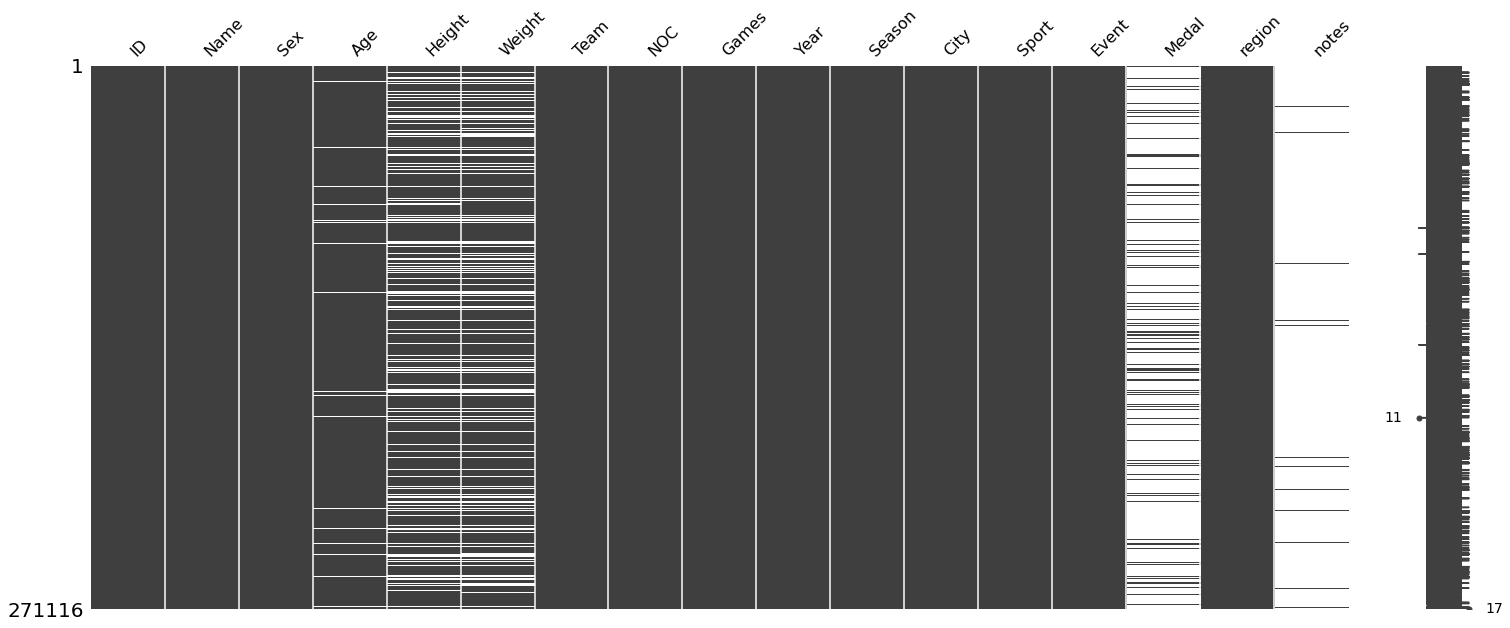

In [16]:
msn.matrix(df)
plt.show()

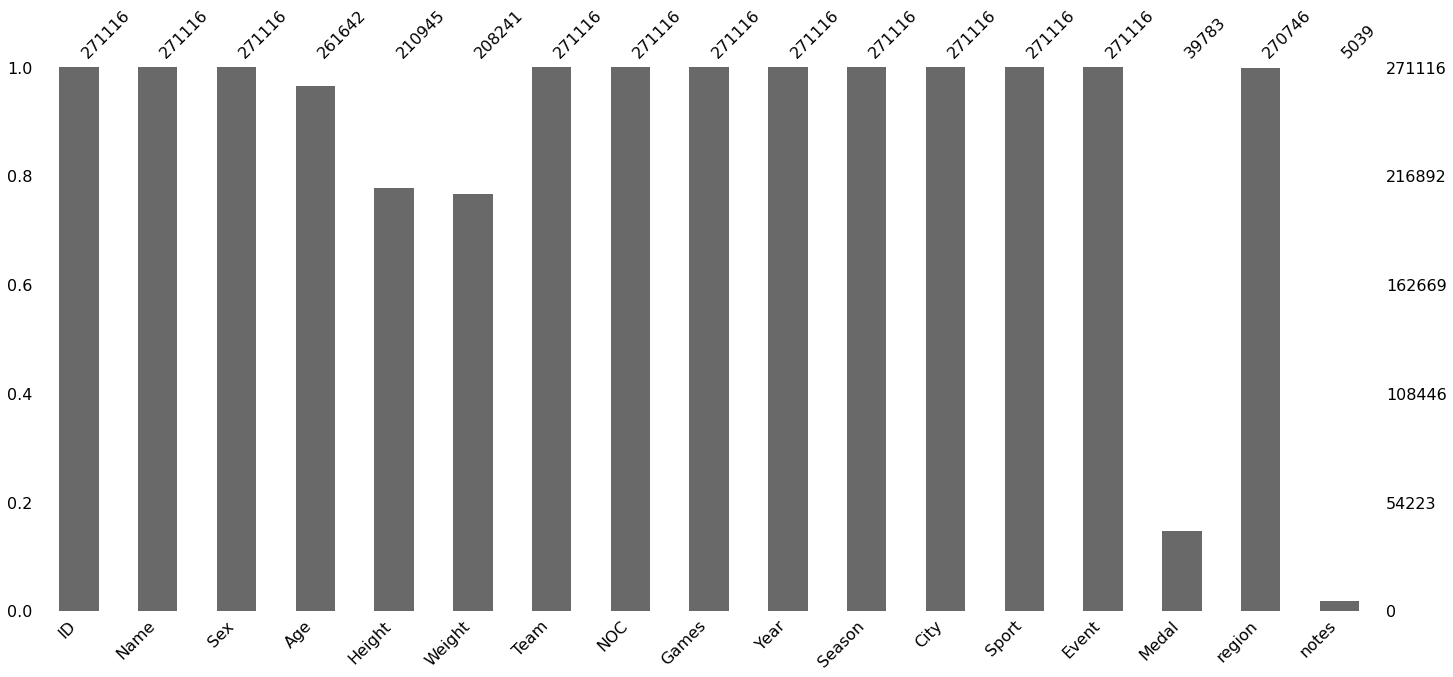

In [17]:
msn.bar(df)
plt.show()

In [18]:
events=df.groupby(['Year', 'Season', 'City'], as_index=False).first()

In [19]:
events.head()

,Year,Season,City,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Sport,Event,Medal,region,notes
0,1896,Summer,Athina,1724,Aristidis Akratopoulos,M,24.0,183.0,66.0,Greece,GRE,1896 Summer,Tennis,Tennis Men's Singles,Silver,Greece,None
1,1900,Summer,Paris,4,Edgar Lindenau Aabye,M,34.0,168.0,60.0,Denmark/Sweden,DEN,1900 Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,Bohemia
2,1904,Summer,St. Louis,404,"Louis Grenville ""Lou"" Abell",M,19.0,168.0,77.0,Vesper Boat Club,USA,1904 Summer,Rowing,Rowing Men's Coxed Eights,Gold,USA,Newfoundland
3,1906,Summer,Athina,139,"George ""Ioannis"" Abbot",M,21.0,182.0,77.0,Thessalonki-1,GRE,1906 Summer,Football,Football Men's Football,Bronze,Greece,Crete
4,1908,Summer,London,635,Alfredo Accorsi,M,27.0,188.0,78.0,Italy,ITA,1908 Summer,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Italy,Australasia


##### Summer olympics

In [20]:
event_summer=events.loc[(events['Season']=='Summer'), ['Year', 'Season', 'City']]

In [21]:
event_summer

,Year,Season,City
0,1896,Summer,Athina
1,1900,Summer,Paris
2,1904,Summer,St. Louis
3,1906,Summer,Athina
4,1908,Summer,London
5,1912,Summer,Stockholm
6,1920,Summer,Antwerpen
7,1924,Summer,Paris
9,1928,Summer,Amsterdam
11,1932,Summer,Los Angeles


##### Winter olympics

In [22]:
event_winter=events.loc[(events['Season']=='Winter'), ['Year', 'Season', 'City']]

In [23]:
event_winter

,Year,Season,City
8,1924,Winter,Chamonix
10,1928,Winter,Sankt Moritz
12,1932,Winter,Lake Placid
14,1936,Winter,Garmisch-Partenkirchen
16,1948,Winter,Sankt Moritz
18,1952,Winter,Oslo
21,1956,Winter,Cortina d'Ampezzo
23,1960,Winter,Squaw Valley
25,1964,Winter,Innsbruck
27,1968,Winter,Grenoble


##### Number of unique sports in olympics

In [24]:
print(df['Sport'].unique())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [25]:
print(df['Sport'].nunique())

66


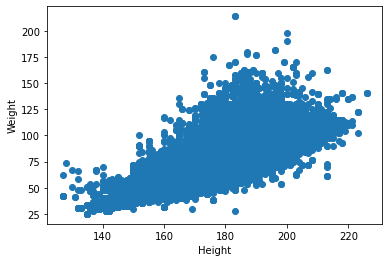

In [26]:
plt.scatter(df.Height,df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

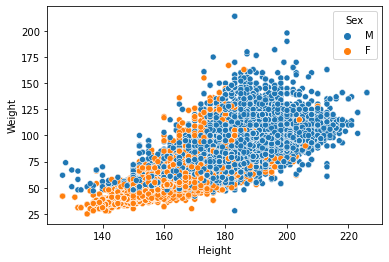

In [27]:
sns.scatterplot(x='Height', y='Weight', hue='Sex', data=df)
plt.show()

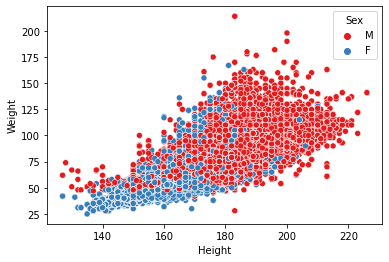

In [28]:
# using discrete color scheme
sns.scatterplot(x='Height', y='Weight', hue='Sex', data=df, palette='Set1')
plt.show()

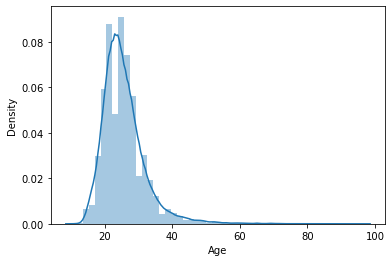

In [29]:
sns.distplot(df['Age'])
plt.show()

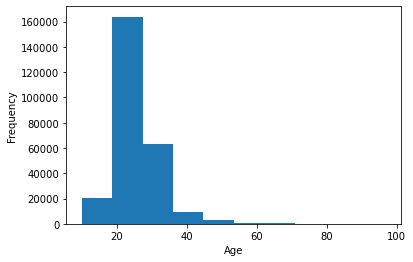

In [30]:
#histogram
plt.hist(df.Age)
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

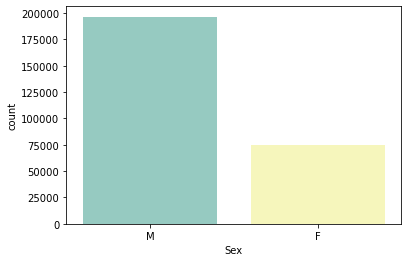

In [31]:
sns.countplot(x="Sex", data=df, palette="Set3")
plt.show()

##### Top Countries in Olympic Medals

In [32]:
topc=df.groupby('region')['Medal'].count().nlargest(20).reset_index()

In [33]:
topc.head()

,region,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777


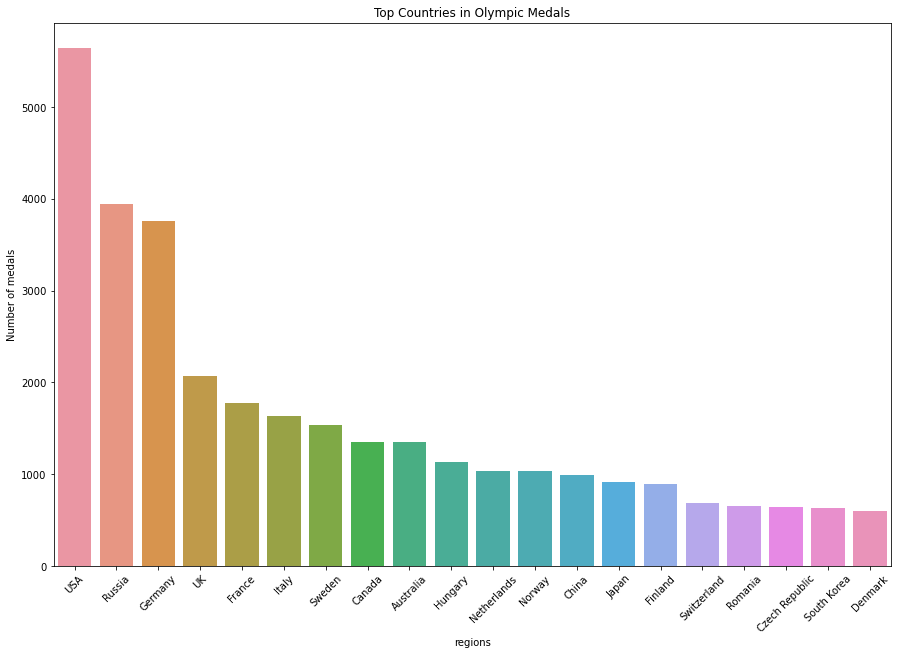

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x='region', y='Medal', data=topc)
plt.xlabel('regions')
plt.ylabel('Number of medals')
plt.title('Top Countries in Olympic Medals')
plt.xticks(rotation=45)
plt.show()

In [35]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


##### Number of medals of countries in summer olympics

In [36]:
df[df['Season']=='Summer'].groupby(['region', 'Medal']).size().reset_index()

,region,Medal,0
0,Afghanistan,Bronze,2
1,Algeria,Bronze,8
2,Algeria,Gold,5
3,Algeria,Silver,4
4,Argentina,Bronze,91
...,...,...,...
318,Zambia,Bronze,1
319,Zambia,Silver,1
320,Zimbabwe,Bronze,1
321,Zimbabwe,Gold,17


In [37]:
summer_medals=df.groupby(['region', 'Medal']).size().reset_index()
summer_medals.columns=['region', 'Medal', 'count']

In [38]:
summer_medals.pivot('region', 'Medal', 'count')

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,522.0,368.0,459.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,NaN,1.0,3.0
"Virgin Islands, US",NaN,NaN,1.0


In [39]:
summer_medals.pivot('region', 'Medal', 'count').fillna(0)

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,522.0,368.0,459.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,0.0,1.0,3.0
"Virgin Islands, US",0.0,0.0,1.0


In [40]:
summer_medals_20=summer_medals.pivot('region', 'Medal', 'count').fillna(0).sort_values(['Gold'], ascending=False).head(20)

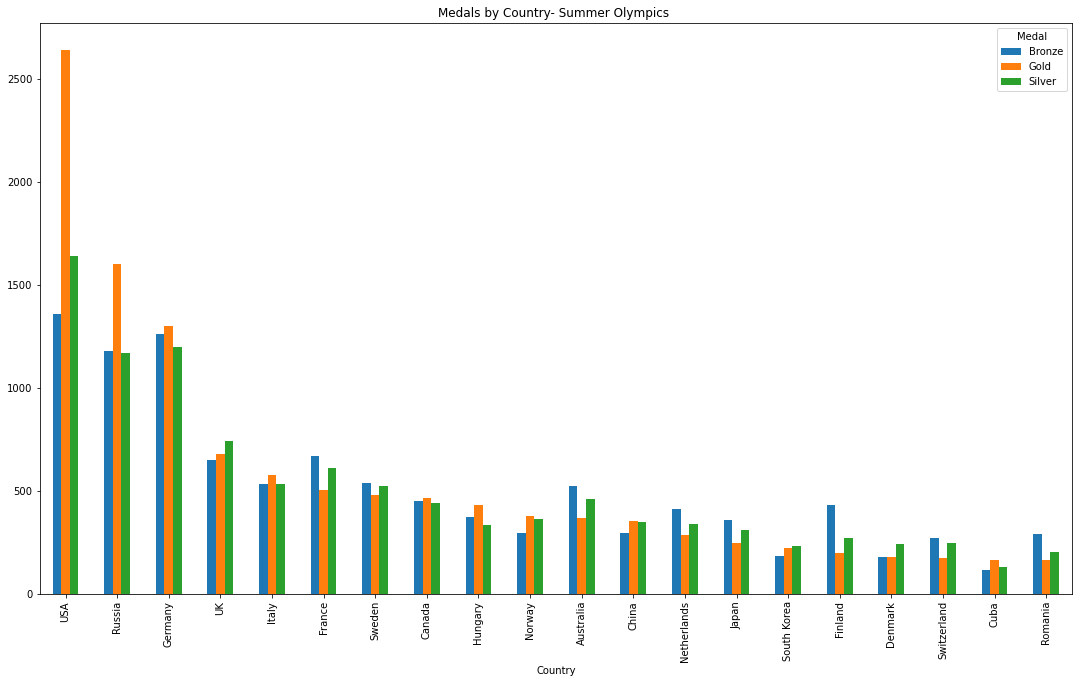

In [41]:
summer_medals_20.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country- Summer Olympics ')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

##### Number of medals of countries in winter olympics

In [42]:
winter_medals=df[df['Season']=='Winter'].groupby(['region', 'Medal']).size().reset_index()

In [43]:
winter_medals.head()

,region,Medal,0
0,Australia,Bronze,7
1,Australia,Gold,6
2,Australia,Silver,3
3,Austria,Bronze,103
4,Austria,Gold,79


In [44]:
winter_medals.columns=['region', 'Medal', 'count']

In [45]:
winter_medals_20=winter_medals.pivot(index='region', columns='Medal', values='count').sort_values('Gold', 
                                                                                                  ascending=False).head(20)

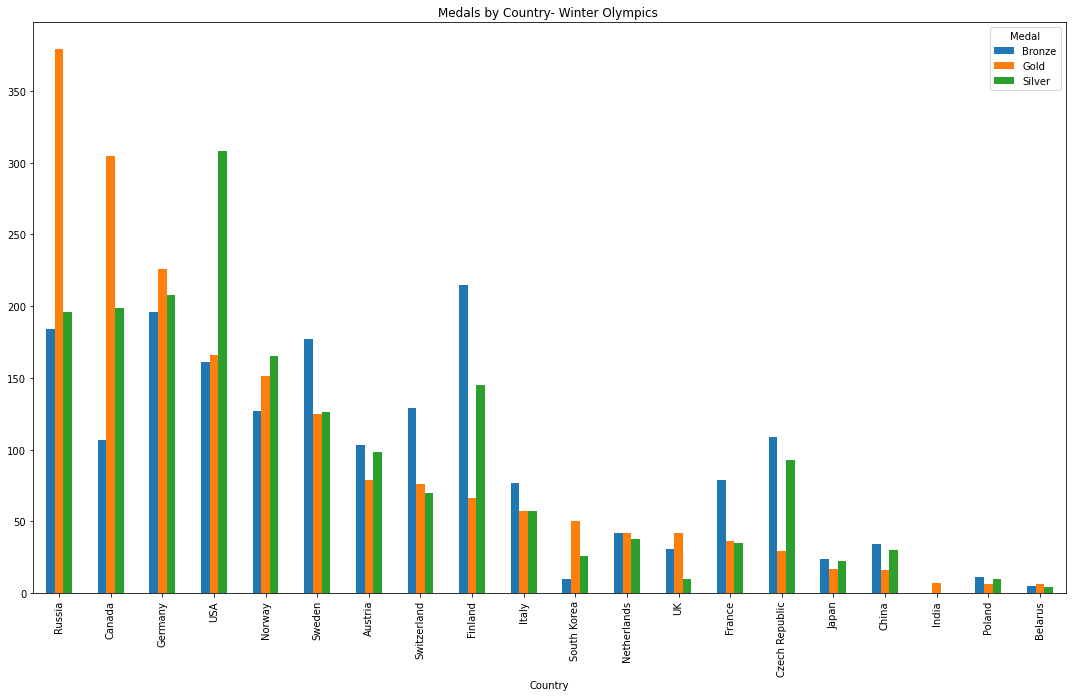

In [46]:
winter_medals_20.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country- Winter Olympics ')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

##### Number of participants by year

In [47]:
year=df['Year'].value_counts()

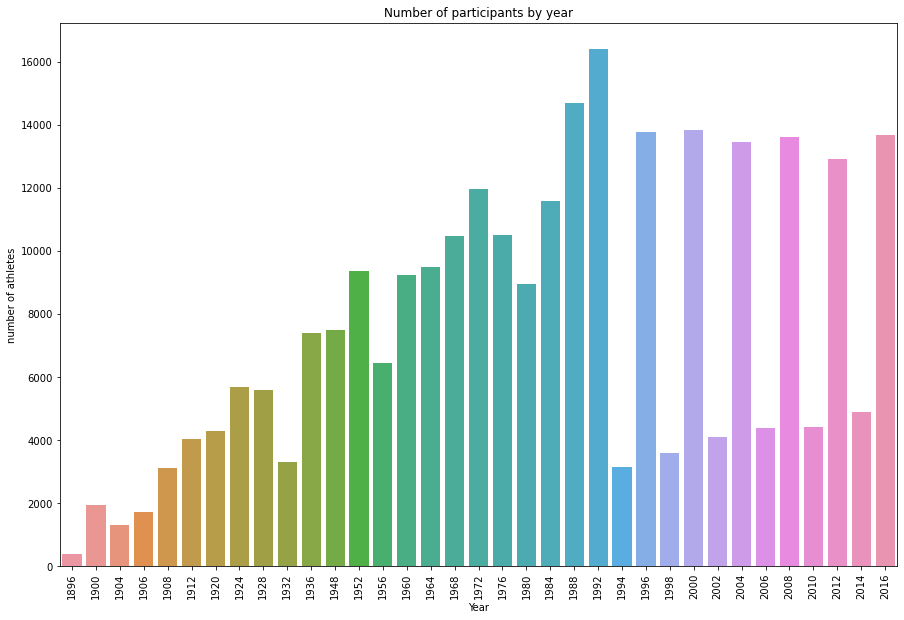

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=year.index, y=year.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("number of athletes")
plt.title("Number of participants by year")
plt.show()

##### Number of participants by year and gender

In [49]:
year_sex_medal=df.groupby(['Year', 'Sex'])['Medal'].count().reset_index()

In [50]:
year_sex_medal.head()

,Year,Sex,Medal
0,1896,M,143
1,1900,F,13
2,1900,M,591
3,1904,F,10
4,1904,M,476


In [51]:
year_sex_medal_pivot=year_sex_medal.pivot(index='Year', columns='Sex', values='Medal').fillna(0)

In [52]:
year_sex_medal_pivot.head()

Sex,F,M
Year,,
1896,0.0,143.0
1900,13.0,591.0
1904,10.0,476.0
1906,6.0,452.0
1908,16.0,815.0


<Figure size 1440x720 with 0 Axes>

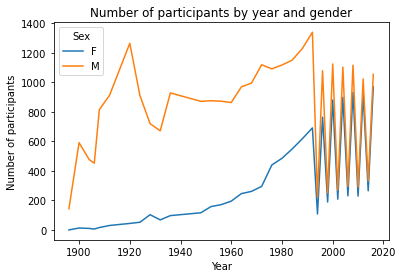

In [53]:
plt.figure(figsize=(20, 10))
fig=plt.gcf()
year_sex_medal_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of participants')
plt.title('Number of participants by year and gender')
plt.show()

##### Number of events in each sport in the summer Olympics

In [54]:
sport_summer=df[df['Season']=='Summer']['Sport'].value_counts().sort_values(ascending=False).head(20)

In [55]:
sport_summer.head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

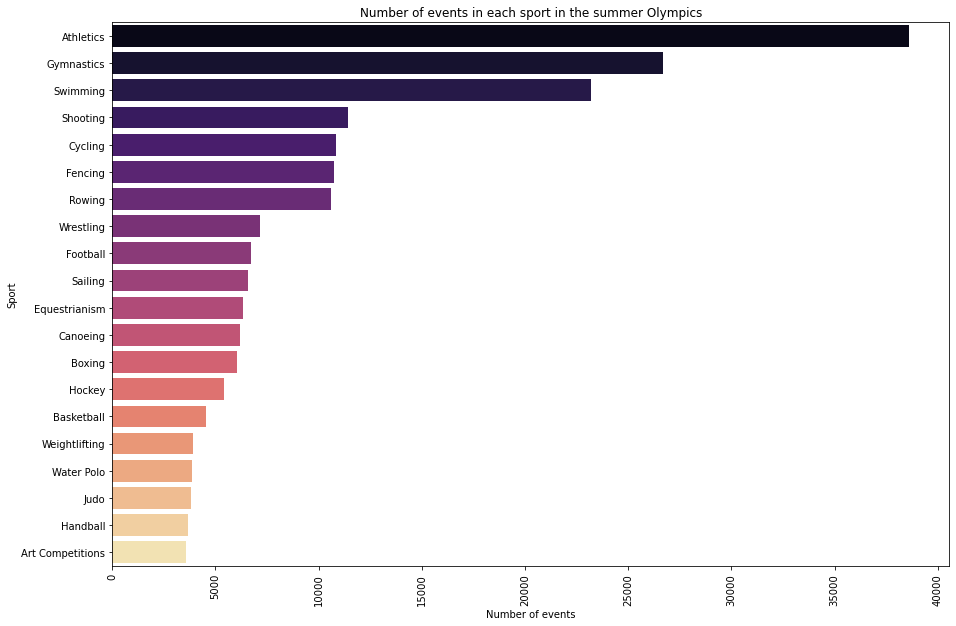

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(y=sport_summer.index, x=sport_summer.values, palette='magma')
plt.xlabel('Number of events')
plt.ylabel('Sport')
plt.xticks(rotation=90)
plt.title("Number of events in each sport in the summer Olympics")
plt.show()

##### Number of events in each sport in the winter Olympics

In [57]:
sport_winter=df[df['Season']=='Winter']['Sport'].value_counts().sort_values(ascending=False)

In [58]:
sport_winter.head()

Cross Country Skiing    9133
Alpine Skiing           8829
Speed Skating           5613
Ice Hockey              5456
Biathlon                4893
Name: Sport, dtype: int64

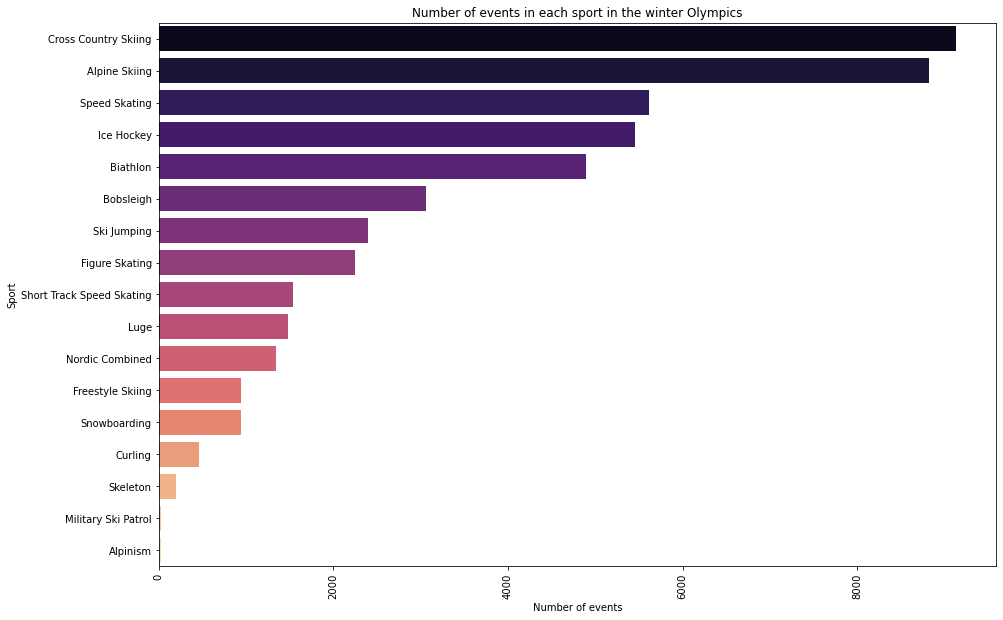

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(y=sport_winter.head(20).index, x=sport_winter.head(20).values, palette='magma')
plt.xlabel('Number of events')
plt.ylabel('Sport')
plt.xticks(rotation=90)
plt.title("Number of events in each sport in the winter Olympics")
plt.show()

##### How many different countries compete in the Summer Olympics each year?

In [60]:
summer_year_region=df[df['Season']=='Summer'].groupby('Year')['region'].nunique()

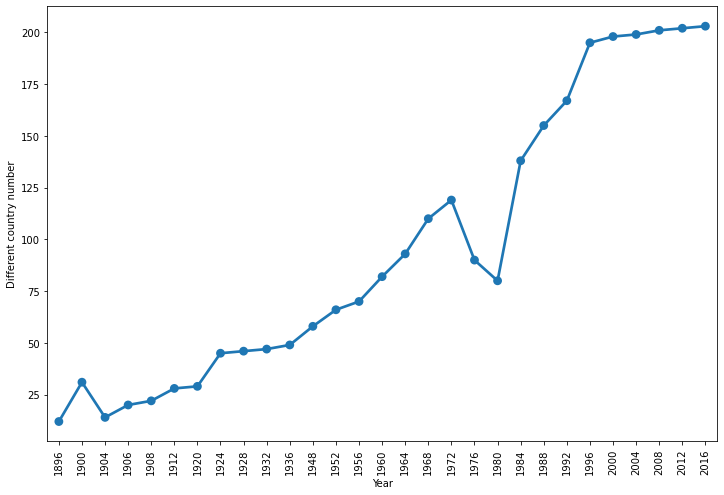

In [61]:
plt.figure(figsize=(12, 8))
sns.pointplot(x=summer_year_region.index, y=summer_year_region.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel('Different country number')
plt.show()

##### How many different countries compete in the Winter Olympics each year?

In [62]:
winter_year_region=df[df['Season']=='Winter'].groupby('Year')['region'].nunique()

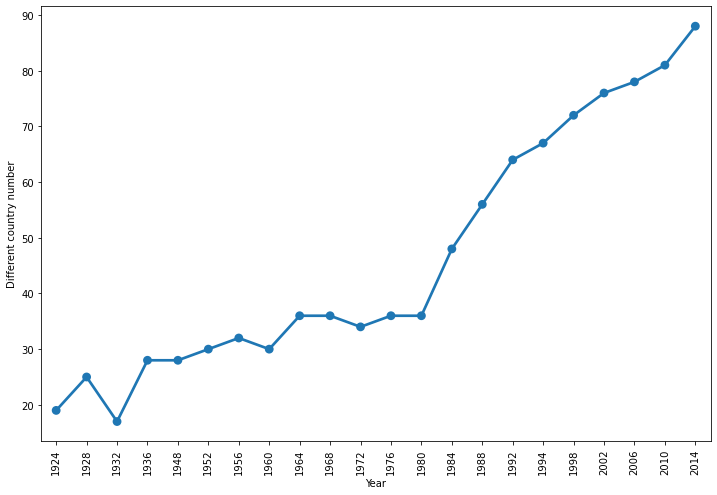

In [63]:
plt.figure(figsize=(12, 8))
sns.pointplot(x=winter_year_region.index, y=winter_year_region.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel('Different country number')
plt.show()

##### Male-Female Ratio in Olympics

In [64]:
sex_count=df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()

In [65]:
sex_count.head()

,Year,Sex,ID
0,1896,M,176
1,1900,F,23
2,1900,M,1201
3,1904,F,6
4,1904,M,644


In [66]:
sex_count.columns=['Year', 'Sex', 'count']

In [67]:
sex_count_pivot=sex_count.pivot(index='Year', columns='Sex', values='count').fillna(0)

<Figure size 1440x720 with 0 Axes>

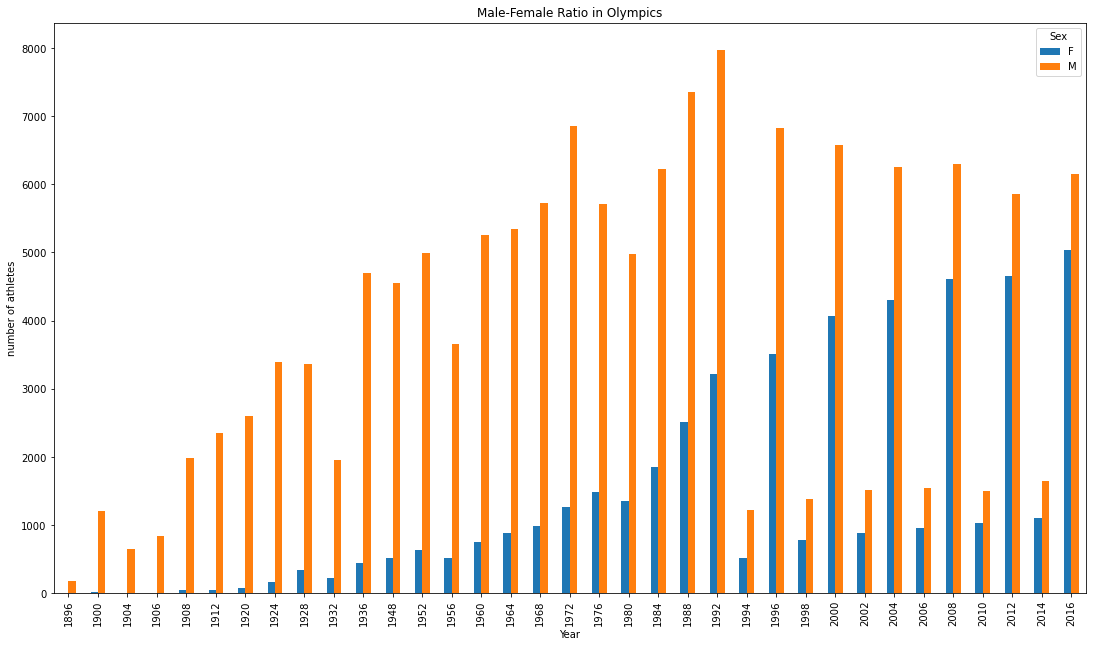

In [68]:
plt.figure(figsize=(20, 10))
sex_count_pivot.plot(kind = "bar"  )
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("Year")
plt.ylabel("number of athletes")
plt.title("Male-Female Ratio in Olympics")
plt.show()

##### Medals by Age

In [69]:
age_medal=events.groupby('Age')['Medal'].count().reset_index()

In [70]:
age_medal.head()

,Age,Medal
0,17.0,1
1,18.0,1
2,19.0,3
3,21.0,2
4,22.0,5


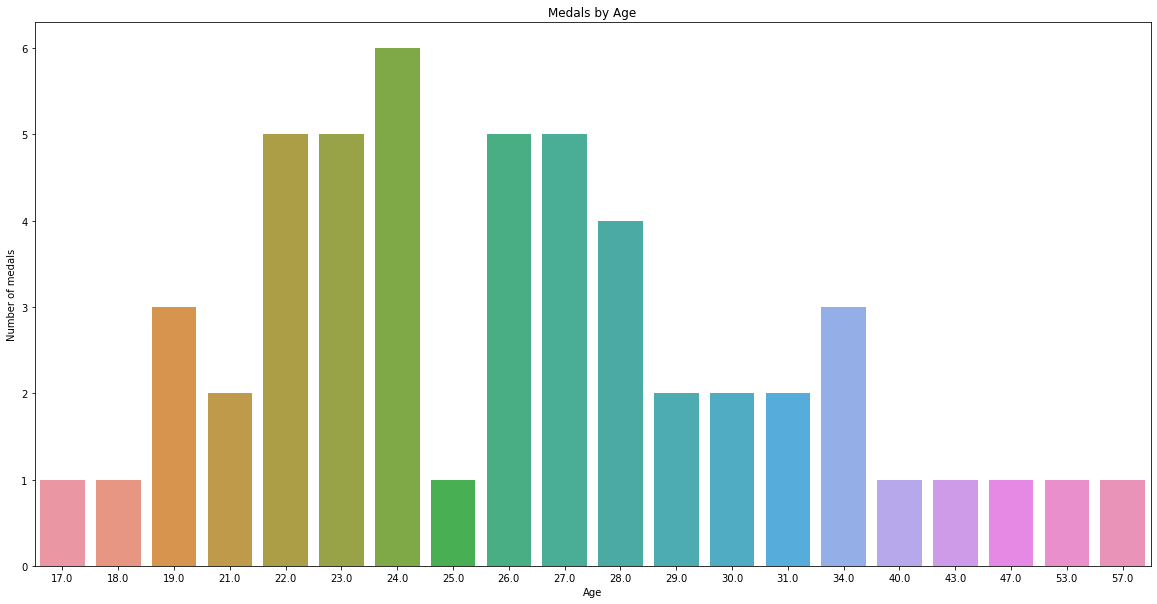

In [71]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Age',y='Medal',data=age_medal)
plt.title('Medals by Age')
plt.xlabel('Age')
plt.ylabel('Number of medals')
plt.show()

##### Average age of Athletes by Sports - Summer olympics

In [72]:
summer_sport_age=df[df['Season']=='Summer'].groupby('Sport')['Age'].mean().sort_values()

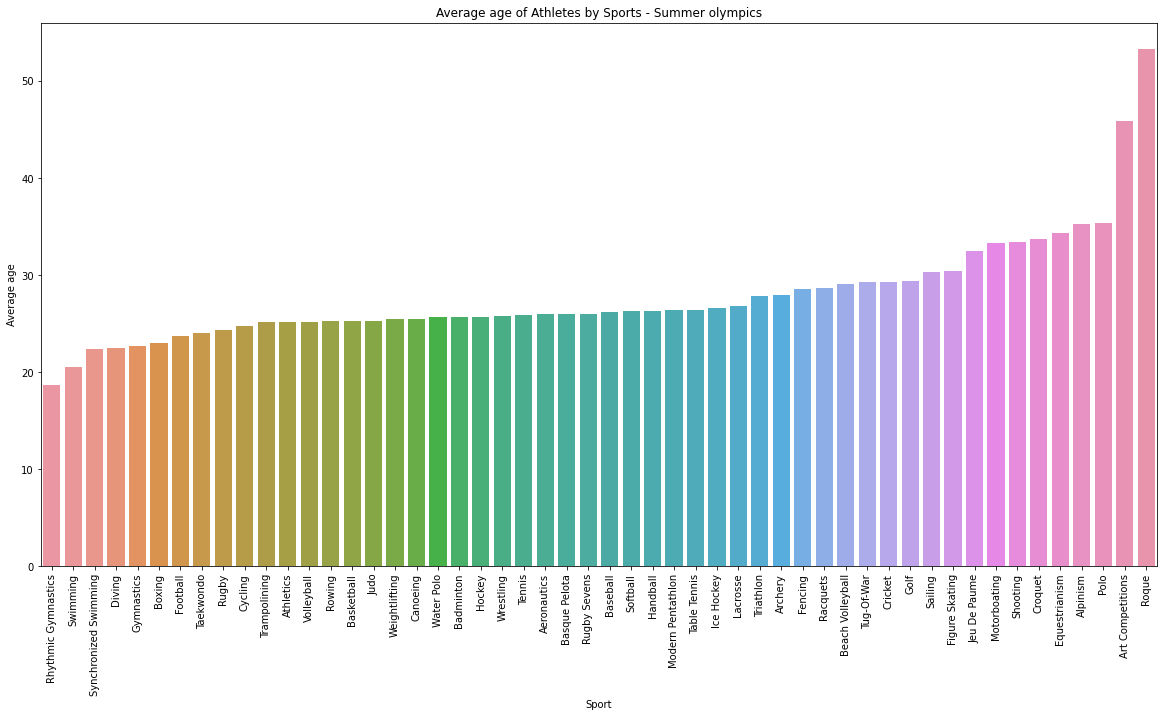

In [73]:
plt.figure(figsize=(20, 10))
sns.barplot(summer_sport_age.index, summer_sport_age.values)
plt.xlabel('Sport')
plt.ylabel('Average age')
plt.title('Average age of Athletes by Sports - Summer olympics')
plt.xticks(rotation = 90)
plt.show()

##### Average age of Athletes by Sports- Winter olympics

In [74]:
winter_sport_age=df[df['Season']=='Winter'].groupby('Sport')['Age'].mean().sort_values()

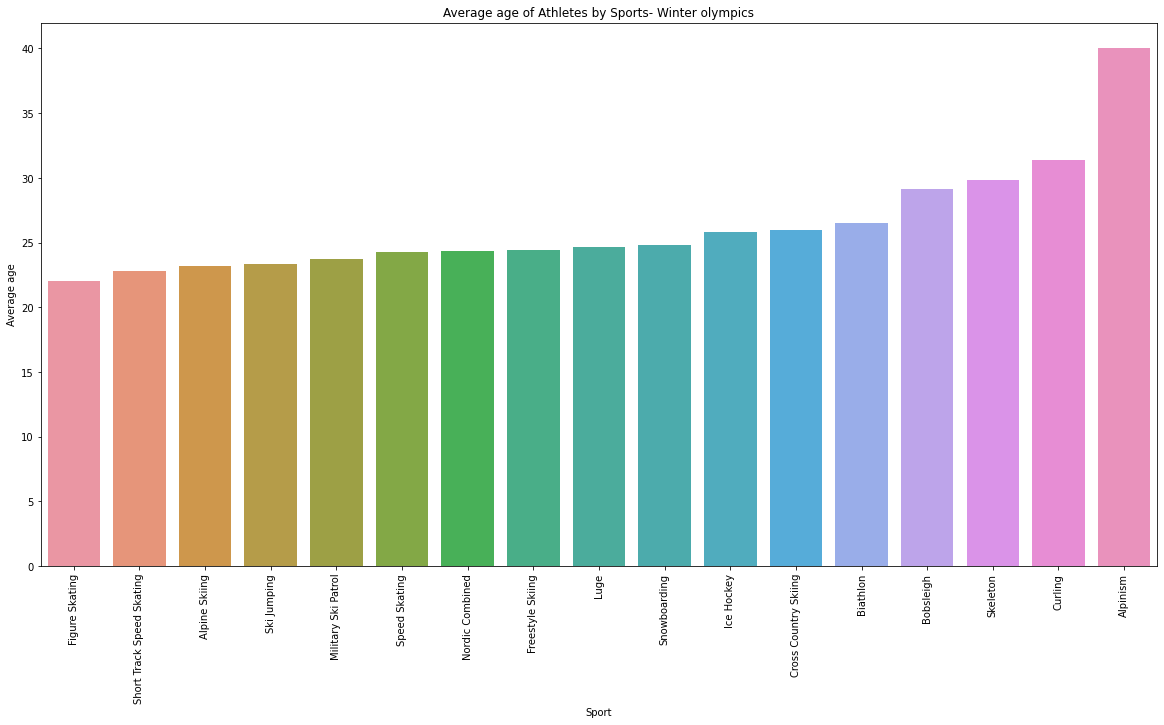

In [75]:
plt.figure(figsize=(20, 10))
sns.barplot(winter_sport_age.index, winter_sport_age.values)
plt.xlabel('Sport')
plt.ylabel('Average age')
plt.title('Average age of Athletes by Sports- Winter olympics')
plt.xticks(rotation = 90)
plt.show()

##### Age distribution of Gold Medals

In [76]:
goldMedal=df[df['Medal']=='Gold']

In [77]:
goldMedal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


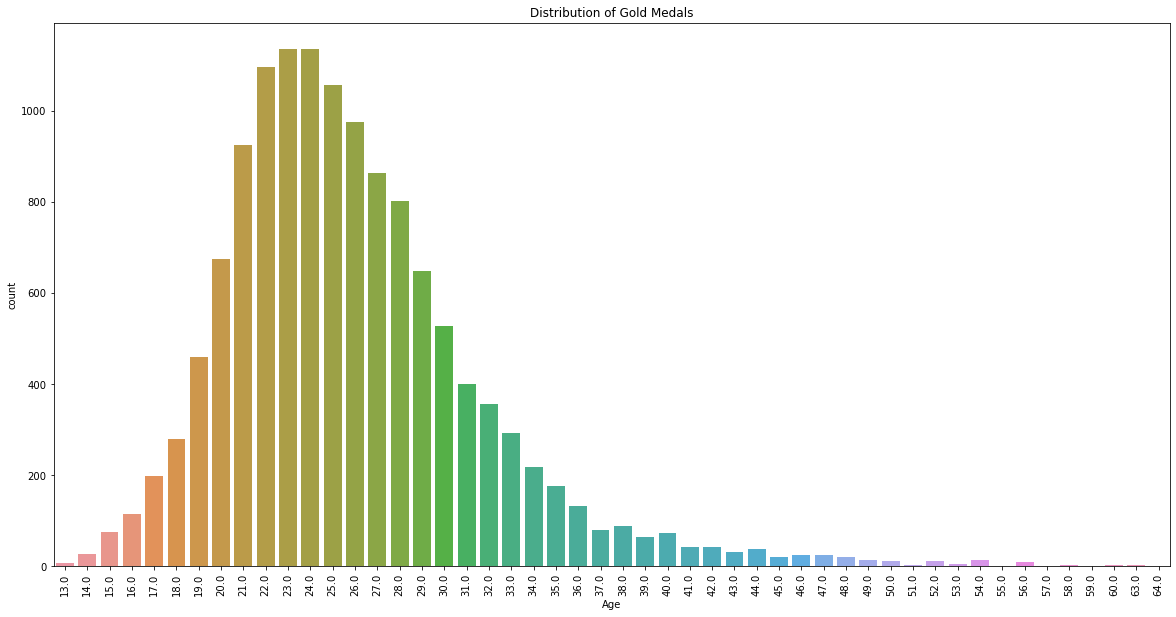

In [78]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedal['Age'])
plt.xticks(rotation=90)
plt.title('Distribution of Gold Medals')
plt.show()

As you can see, we have competitors who are over 50 years old. Let's try to see more information about this

In [79]:
goldMedal[goldMedal['Age']>50]['ID'].nunique()

54

In [80]:
gold_over_50=goldMedal[goldMedal['Age']>50].groupby('Sport')['ID'].nunique().sort_values(ascending=False)

In [81]:
gold_over_50

Sport
Equestrianism       14
Sailing             12
Archery              8
Art Competitions     8
Shooting             8
Curling              2
Alpinism             1
Croquet              1
Roque                1
Name: ID, dtype: int64

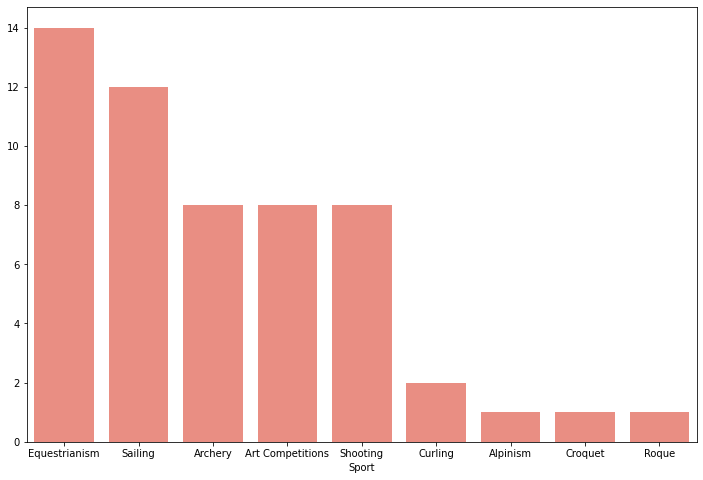

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(gold_over_50.index, gold_over_50.values, color="salmon")
plt.show()